<a href="https://colab.research.google.com/github/PraveenAbhiVamsi/Stockprize_predection/blob/main/Tesla_Stock_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the Tesla stock price data
df = pd.read_csv('/content/Tesla_raw_data.csv')
df.head()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,6/29/2010,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
1,6/30/2010,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2,7/1/2010,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
3,7/2/2010,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
4,7/6/2010,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN


In [ ]:
# Extract the 'Close' prices as the target variable
data = df['close'].values.reshape(-1, 1)
data.shape

(3322, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3322 non-null   object 
 1   open            3322 non-null   float64
 2   high            3322 non-null   float64
 3   low             3322 non-null   float64
 4   close           3322 non-null   float64
 5   volume          3322 non-null   int64  
 6   adjusted_close  3322 non-null   float64
 7   change_percent  3321 non-null   float64
 8   avg_vol_20d     3303 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 233.7+ KB


### Finding the null value

# The below line is to caliculate the number of missing values in the dataframe df

In [ ]:
df.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
adjusted_close     0
change_percent     1
avg_vol_20d       19
dtype: int64

In [ ]:
#  replace NaN values with zeros
df.fillna(0)

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,6/29/2010,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,0.00,0.0
1,6/30/2010,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,0.0
2,7/1/2010,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,0.0
3,7/2/2010,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,0.0
4,7/6/2010,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,0.0
...,...,...,...,...,...,...,...,...,...
3317,9/1/2023,257.2600,259.0794,242.0100,245.0100,132541594,245.0100,-5.06,112651344.2
3318,9/5/2023,245.0000,258.0000,244.8600,256.4900,129469602,256.4900,4.69,113569929.0
3319,9/6/2023,255.1350,255.3900,245.0600,251.9200,116959797,251.9200,-1.78,114585809.8
3320,9/7/2023,245.0700,252.8100,243.2650,251.4900,115312898,251.4900,-0.17,115271639.5


*the below line is to understand the statistical view of the data *

**Count:** The number of non-null values in each column.

**Mean:** The average value of each column.

**Std:** The standard deviation, which measures the dispersion of values around the mean.

**Min:** The minimum value in each column.

**25%, 50%, 75%:** The quartiles, which represent the values below which a given percentage of observations fall. The 50% is the median.

**Max:** The maximum value in each column.

In [ ]:
df.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3322.000000,3321.000000,3.303000e+03
mean,309.656139,316.512291,302.556364,309.716696,1.960849e+07,66.452163,0.216628,9.623270e+07
std,294.828884,302.956737,286.530087,295.027282,3.627605e+07,99.129171,3.598838,6.460500e+07
min,16.140000,16.629900,14.979900,15.800100,1.186140e+05,1.053300,-21.060000,4.317139e+06
25%,142.419975,145.765050,139.197600,143.317575,3.104574e+06,9.980675,-1.560000,5.309270e+07
50%,234.415050,238.204950,229.548550,233.994900,6.501879e+06,16.710350,0.120000,8.762201e+07
75%,342.270000,347.755050,336.050025,342.389925,1.799560e+07,55.646525,1.940000,1.290431e+08
max,2295.120000,2318.490000,2186.520000,2238.750000,3.065906e+08,409.970000,24.400000,3.886315e+08


In [ ]:
df.shape

(3322, 9)

In [ ]:
# Normalize the data between 0 and 1
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
print(data[0:10])
print("shape of data",data.shape) # remember data is the close column value of the dataset

[[0.00363922]
 [0.00361223]
 [0.00277105]
 [0.00152945]
 [0.00013941]
 [0.        ]
 [0.00074671]
 [0.00071972]
 [0.00056223]
 [0.00105266]]
shape of data (3322, 1)


In [ ]:
# Define a function to create sequences and labels for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length:i+sequence_length+1])  # Include only the next value as the label
    return np.array(X), np.array(y)

In [ ]:
# Set the sequence length (number of time steps to look back)
sequence_length = 20


In [ ]:
data.shape

(3322, 1)

In [ ]:
# Create sequences and labels
X, y = create_sequences(data, sequence_length)

In [ ]:
print(X.shape)
print(y.shape)

(3302, 20, 1)
(3302, 1, 1)


# Plotting the stock prices of Tesla

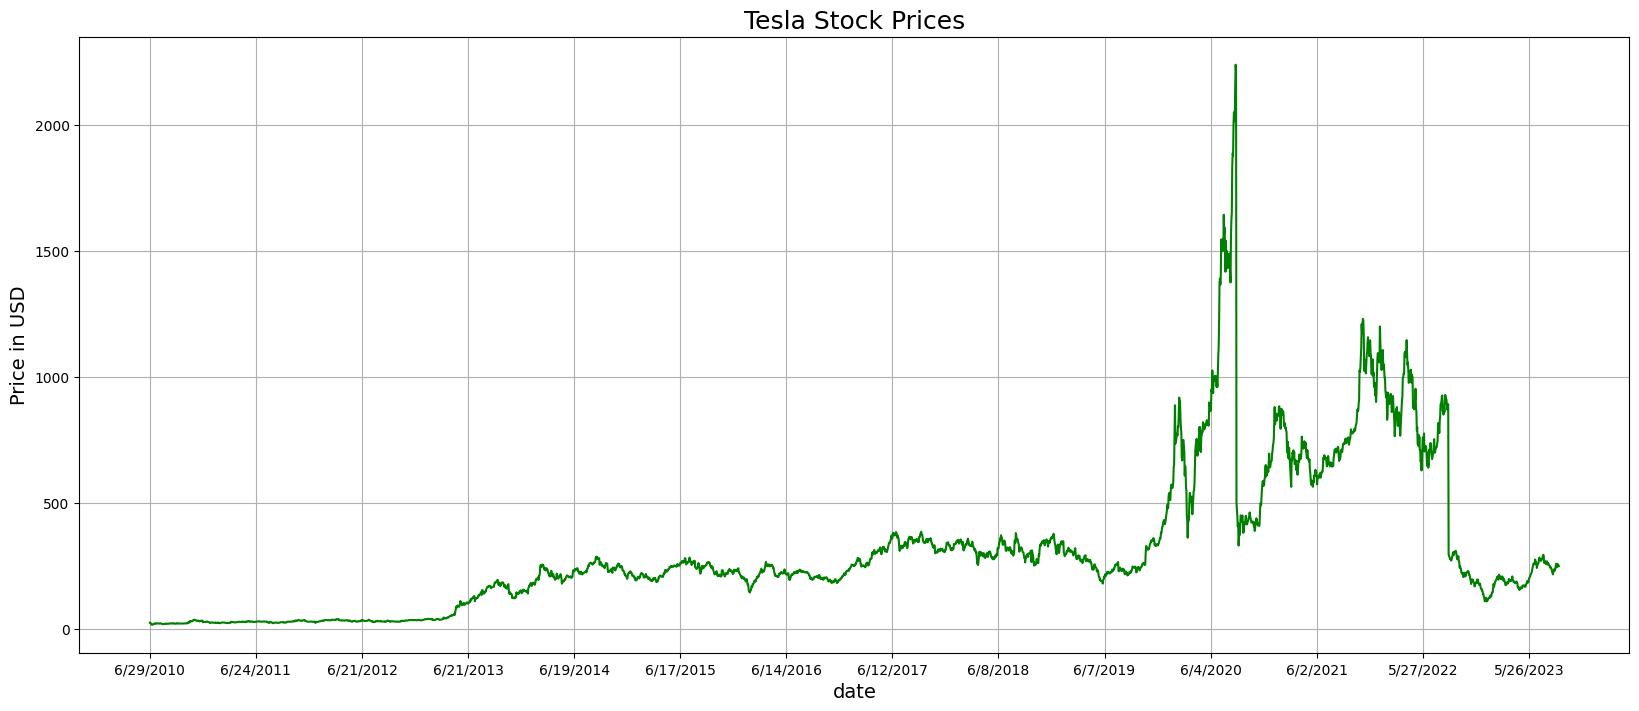

In [ ]:
# Plotting the stock prices of Tesla
# Line plot

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['date'], df['close'], color='green')  # Use df.index for the date and 'Close' for the closing prices
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('date', fontsize=14)  # Correct the label to 'Date'
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Tesla Stock Prices', fontsize=18)
plt.grid()
plt.show()



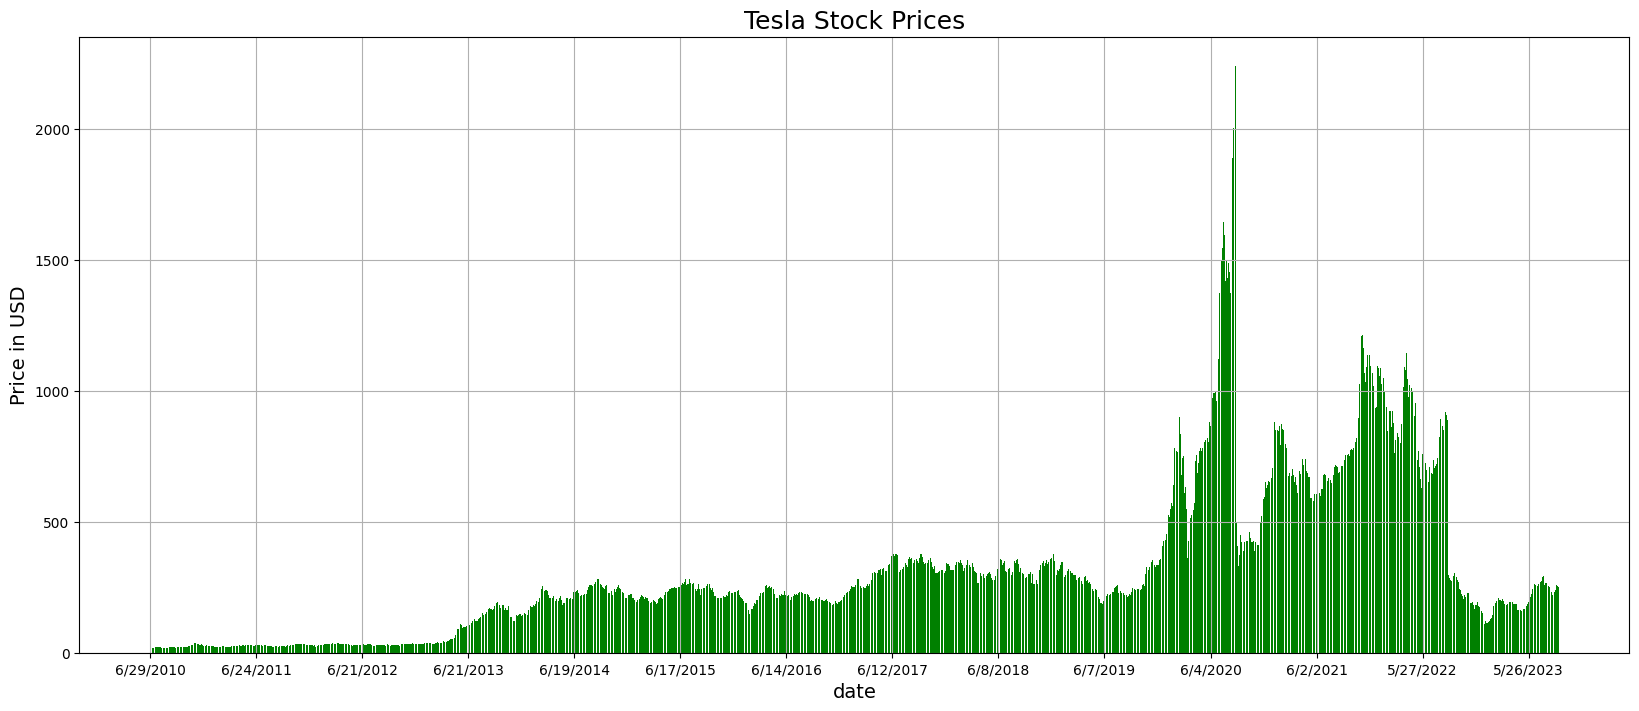

In [ ]:
# Bar plot
fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(df['date'], df['close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Tesla Stock Prices', fontsize=18)
plt.grid()
plt.show()

# Volume Visualization

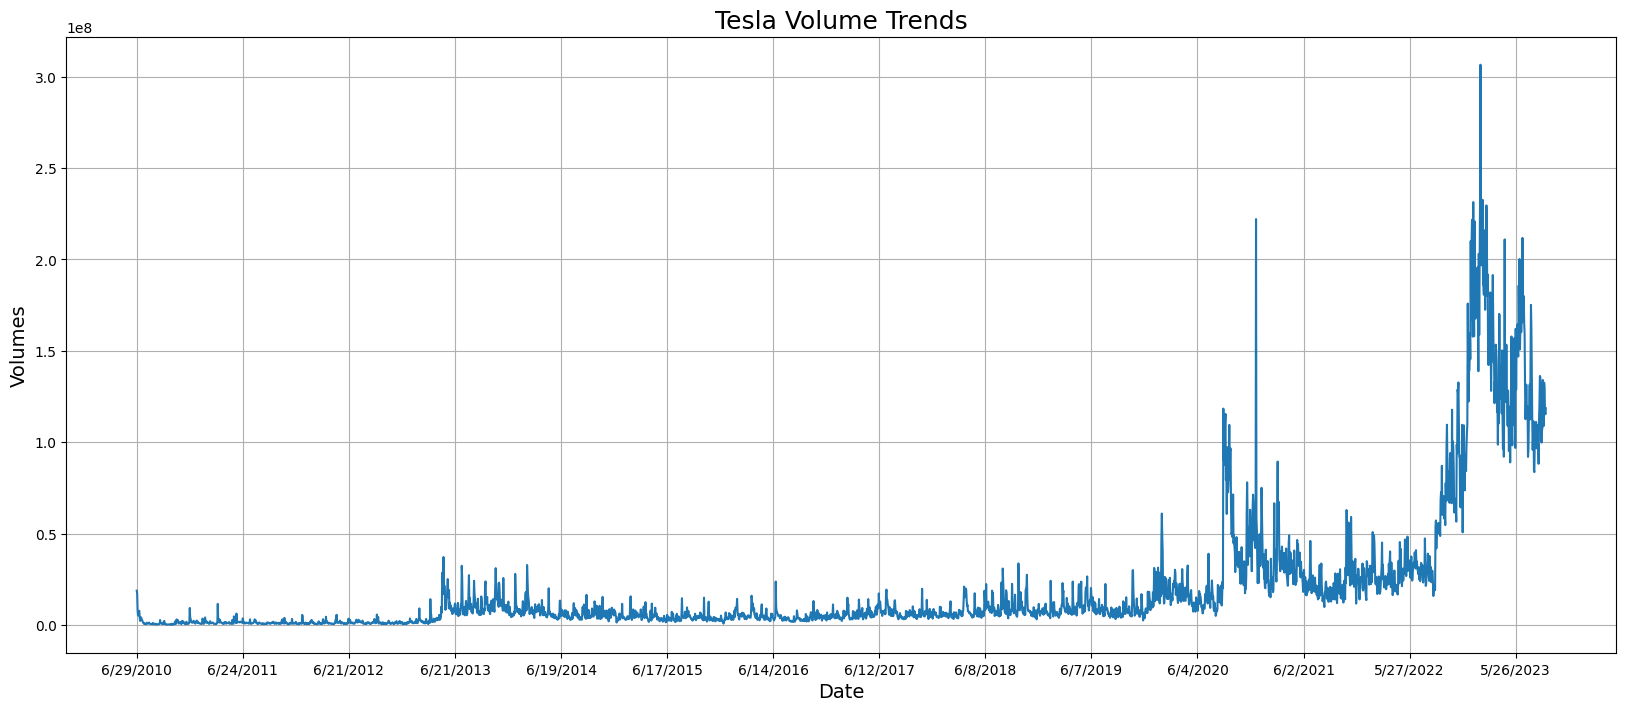

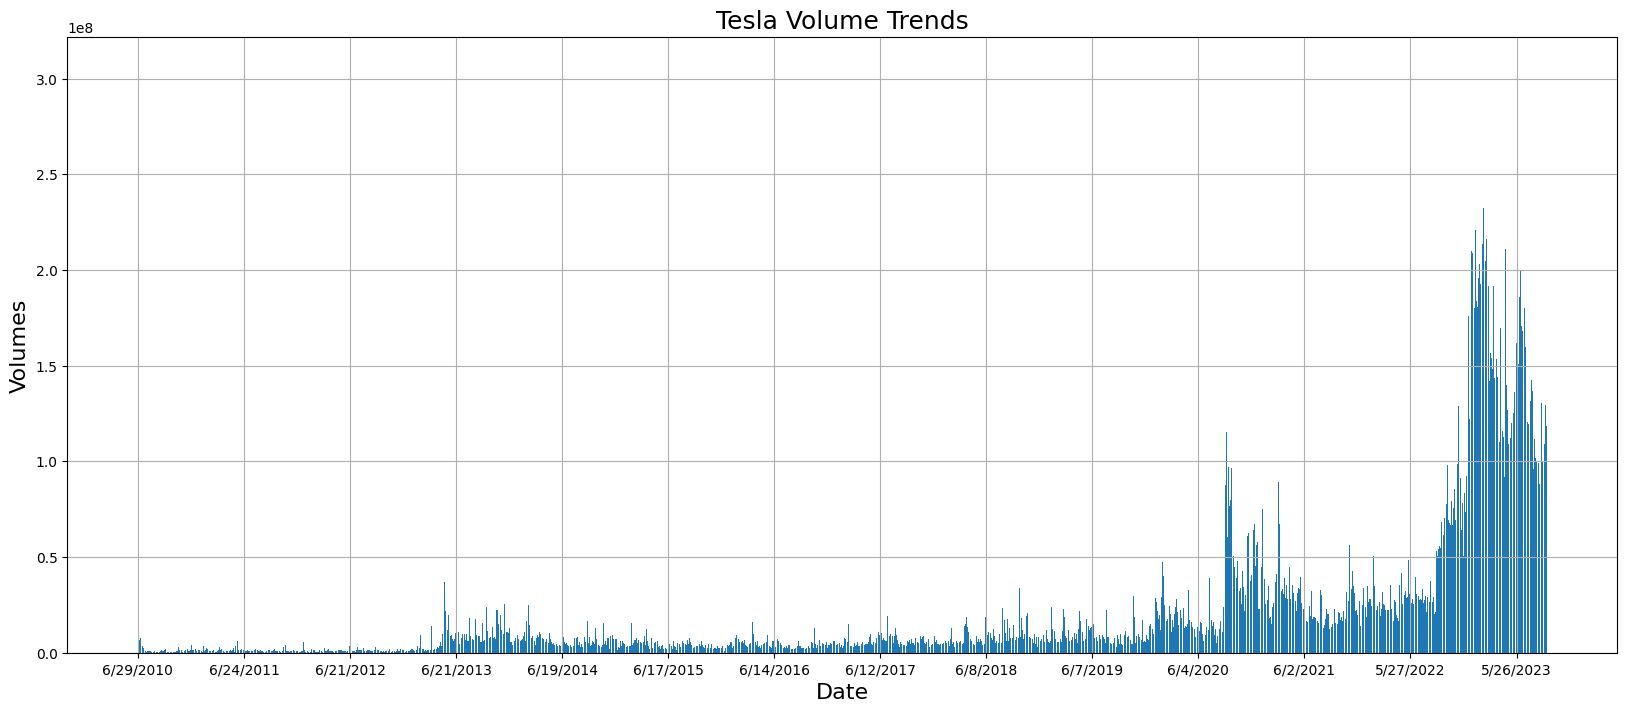

In [ ]:
# Plotting the volume trends of Tesla stock

# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['date'], df['volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Volumes', fontsize=14)
plt.title('Tesla Volume Trends', fontsize=18)
plt.grid()
plt.show()

# Bar plot
fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(df['date'], df['volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Volumes', fontsize=16)
plt.title('Tesla Volume Trends', fontsize=18)
plt.grid()
plt.show()

         date       close




0     2024-03-01        100

1  2024-03-02          110

2  2024-03-03    105

3  2024-03-04    115

4  2024-03-05    120

After cal of df['volume'] = (df['close'] / df['close'].shift(1)) - 1

For the first row, there is no previous day's closing price, so



the percentage change is NaN (Not a Number).

For the second row, the percentage change is calculated as (110 / 100) - 1 = 0.10, indicating a 10% increase from the previous day's closing price.

For the third row, the percentage change is calculated as (105 / 110) - 1 = -0.05, indicating a 5% decrease from the previous day's closing price.

For the fourth row, the percentage change is calculated as (115 / 105) - 1 = 0.10, indicating a 10% increase from the previous day's closing price.

For the fifth row, the percentage change is calculated as (120 / 115) - 1 = 0.04, indicating a 4% increase from the previous day's closing price

         date  close  volume
0  2024-03-01    100     NaN

1  2024-03-02    110    0.10

2  2024-03-03    105   -0.05

3  2024-03-04    115    0.10

4  2024-03-05    120    0.04


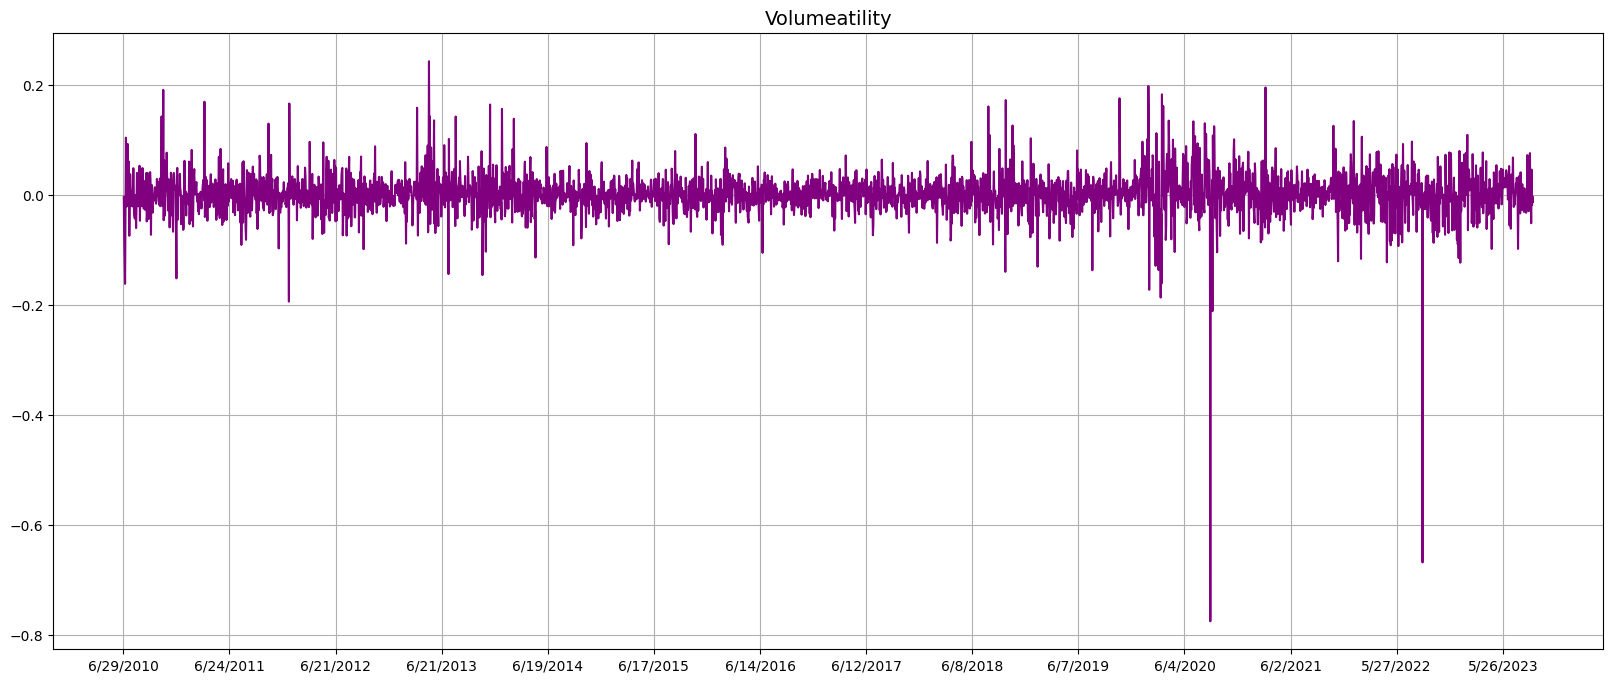

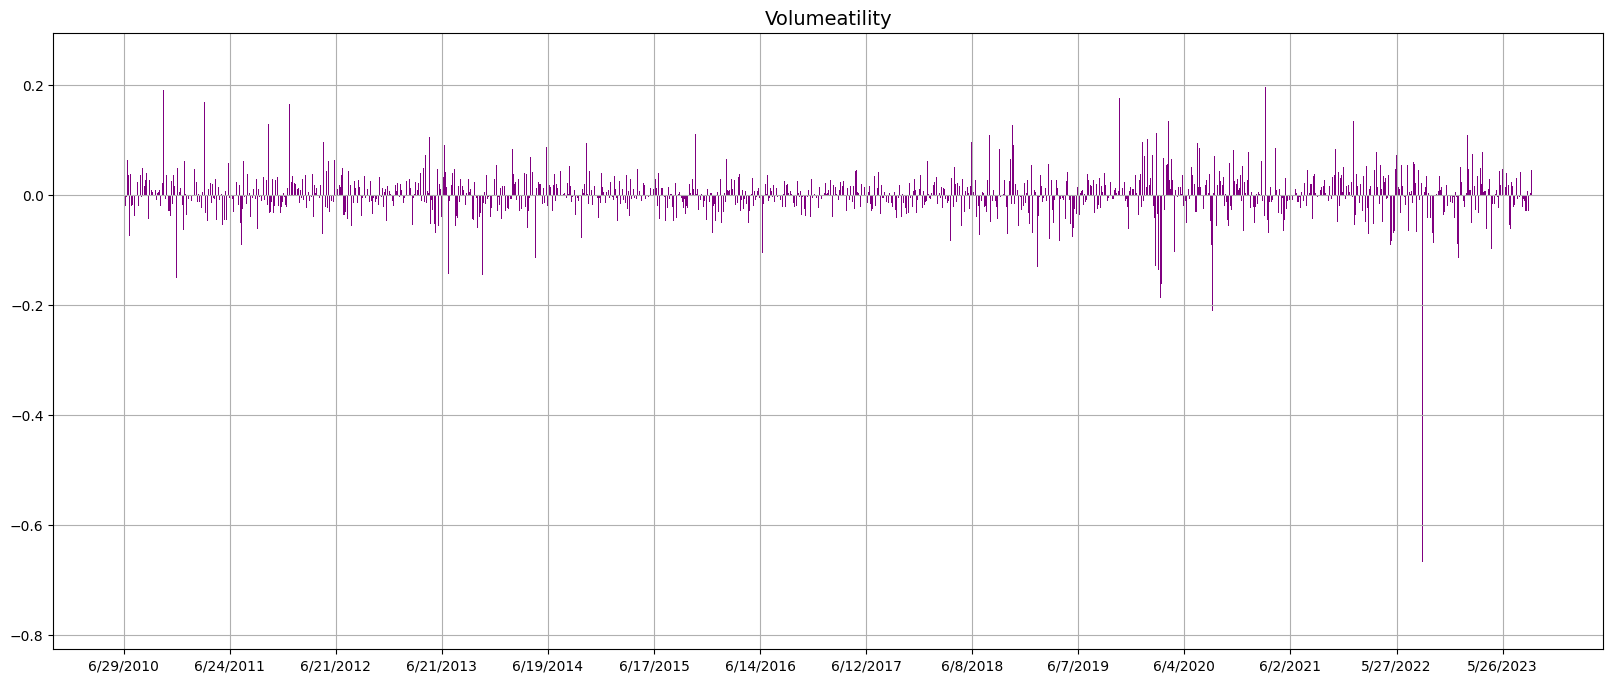

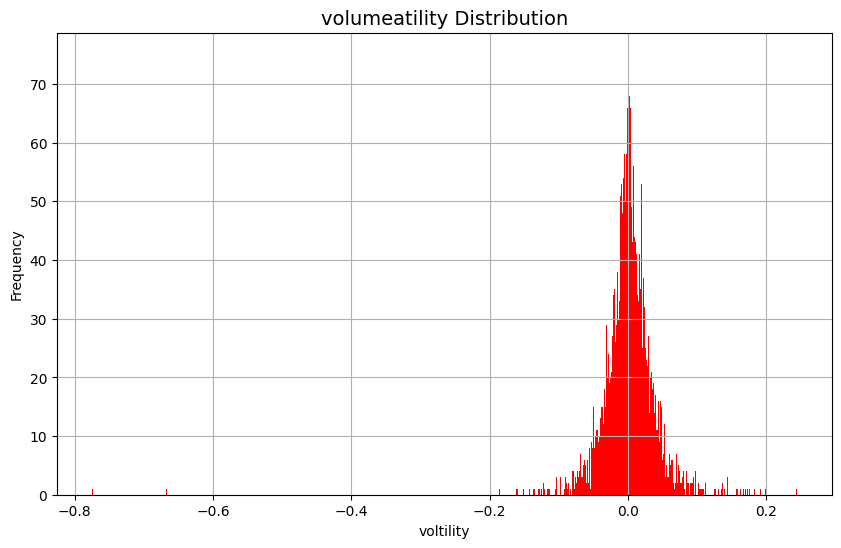

In [ ]:
# Calculate the daily volumeatility
df['volume'] = (df['close'] / df['close'].shift(1)) - 1

# Create the line plot for volumeatility
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['date'], df['volume'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volumeatility', fontsize=14)
plt.grid()
plt.show()

# Create the bar plot for volumeatility
fig1, ax = plt.subplots(figsize=(20, 8))
ax.bar(df['date'], df['volume'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volumeatility', fontsize=14)
plt.grid()
plt.show()

# Create the histogram for volumeatility
plt.figure(figsize=(10, 6))
df['volume'].hist(bins=1000, color='red')
plt.title('volumeatility Distribution', fontsize=14)
plt.xlabel('voltility')
plt.ylabel('Frequency')
plt.show()

         date  close  volume
0  2024-03-01    100     NaN

1  2024-03-02    110    0.10

2  2024-03-03    105   -0.05

3  2024-03-04    115    0.10

4  2024-03-05    120    0.04

after applying df['Cumulative Return'] = (1 + df['volume']).cumprod()


         date  close  volume  Cumulative Return

0  2024-03-01    100     NaN                NaN

1  2024-03-02    110    0.10           1.100000

2  2024-03-03    105   -0.05           1.045000

3  2024-03-04    115    0.10           1.149500

4  2024-03-05    120    0.04           1.195380



**Process:**
For the first row, there is no previous value, so the cumulative return is NaN (Not a Number).

For the second row, the cumulative return is calculated as (1 + 0.10) = 1.10.

For the third row, the cumulative return is calculated as (1 + (-0.05)) * 1.10 = 1.045.

For the fourth row, the cumulative return is calculated as (1 + 0.10) * 1.045 = 1.1495.

For the fifth row, the cumulative return is calculated as (1 + 0.04) * 1.1495 = 1.19538.

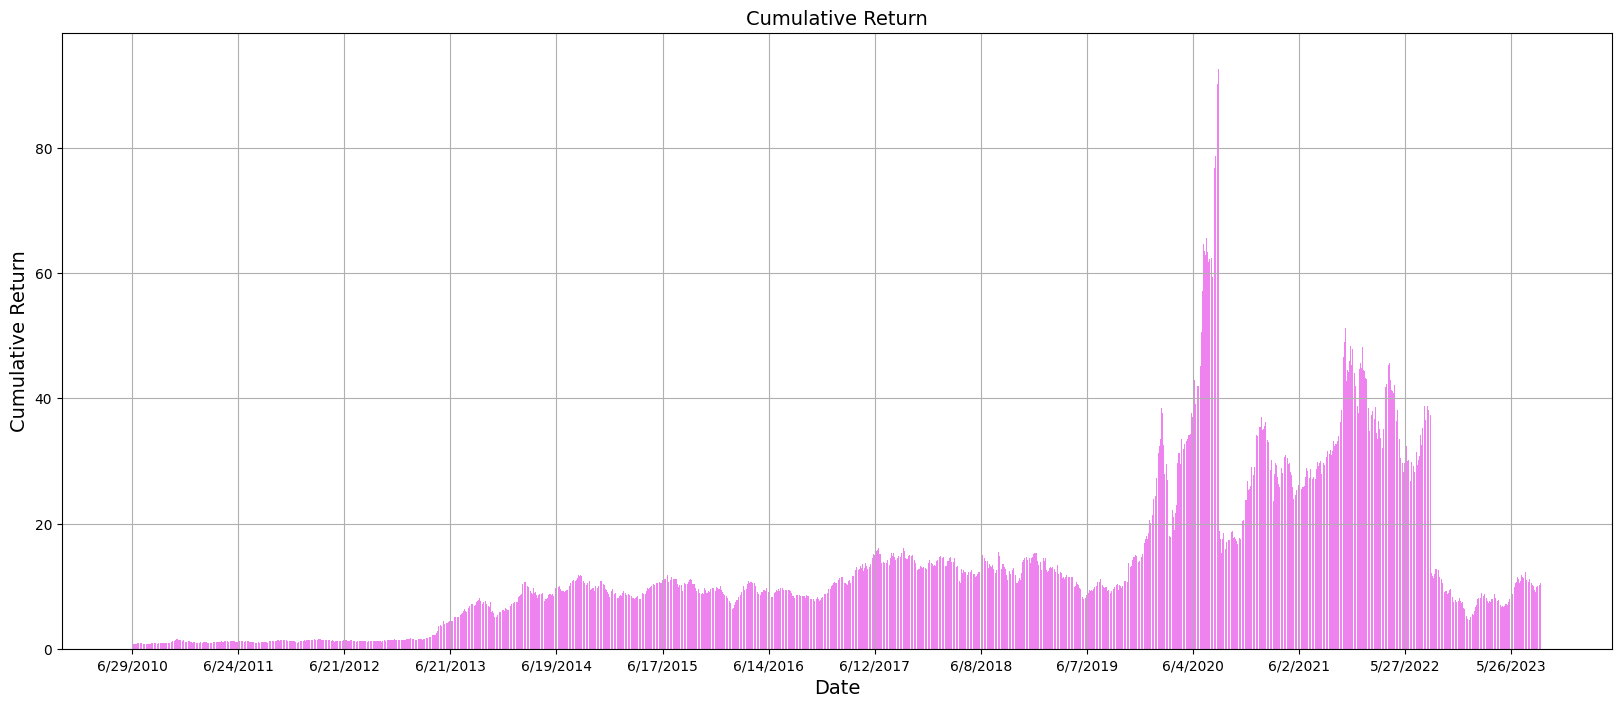

In [ ]:
# Calculate the cumulative return
df['Cumulative Return'] = (1 + df['volume']).cumprod()

# Create the bar plot for cumulative return
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(df['date'], df['Cumulative Return'], color='violet')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative Return', fontsize=14)
plt.title('Cumulative Return', fontsize=14)
plt.grid()
plt.show()

In [ ]:
# to perform various date and time opperations in pandas of datetime objects.
df['date'] = pd.to_datetime(df['date'])


# Calander Effect

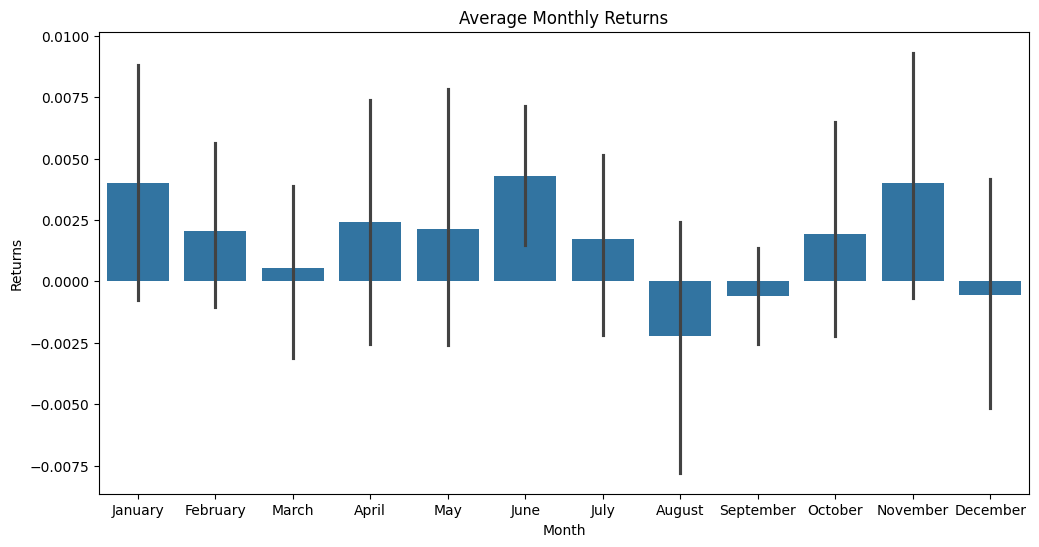

In [ ]:
# Calculate the daily returns
df['Return'] = df['close'].pct_change() # percentage change

# Extract the month and year from the 'date' column
df['Month'] = df['date'].dt.month_name()
df['Year'] = df['date'].dt.year

# Group the data by month and year and calculate the average return
monthly_returns = df.groupby(['Month', 'Year'])['Return'].mean().reset_index()

# Define the desired order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the data by month order
monthly_returns['Month'] = pd.Categorical(monthly_returns['Month'], categories=month_order, ordered=True)
monthly_returns = monthly_returns.sort_values('Month')

# Create a bar plot of the average monthly returns
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_returns, x='Month', y='Return')
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.show()

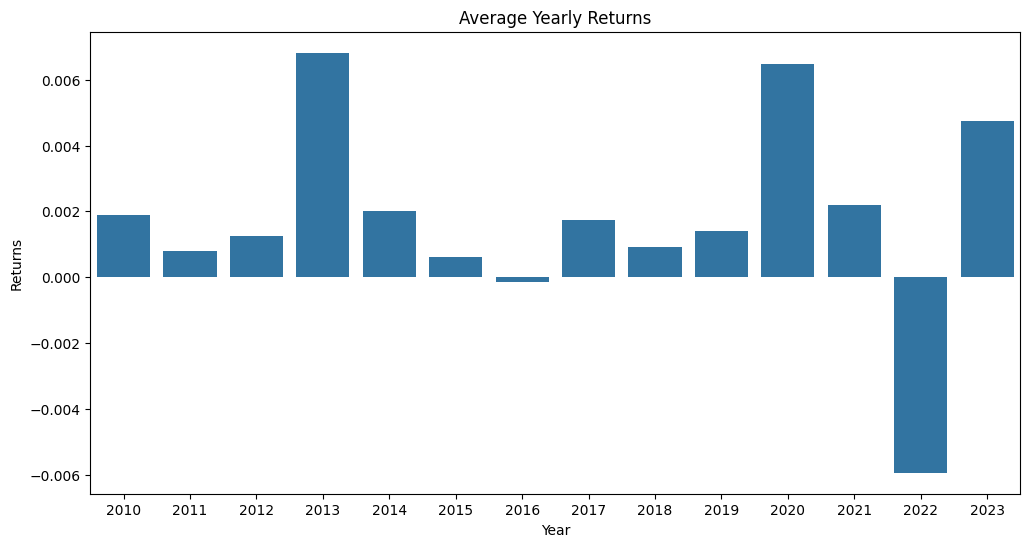

In [ ]:
# Extract the year from the 'date' column
df['Year'] = df['date'].dt.year

# Group the data by year and calculate the average return
yearly_returns = df.groupby(['Year'])['Return'].mean().reset_index()

# Sort the data by year
yearly_returns = yearly_returns.sort_values('Year')

# Create a bar plot of the average yearly returns
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_returns, x='Year', y='Return')
plt.title('Average Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.show()

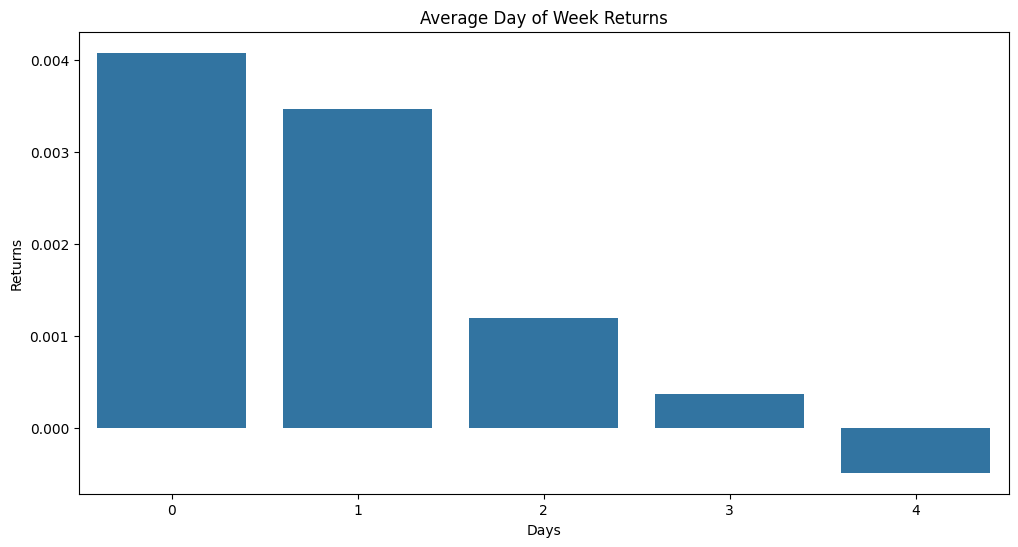

In [ ]:
# Extract the day of the week from the 'Date' column
df['Day'] = df['date'].dt.weekday

# Group the data by day of the week and calculate the average return
daily_returns = df.groupby(['Day'])['Return'].mean().reset_index()

# Sort the data by day of the week
daily_returns = daily_returns.sort_values('Day')

# Create a bar plot of the average daily returns
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_returns, x='Day', y='Return')
plt.title('Average Day of Week Returns')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

df['close'].rolling(10).mean(): This calculates the 10-day moving average of the closing prices. It takes the rolling window of size 10 (i.e., the closing prices of the last 10 days), computes the mean of these prices for each day, and assigns the result to a new column named 'MA for 10 days' in the DataFrame df.

In [ ]:
df.describe()
#df.shape

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d,Cumulative Return,Return,Year,Day
count,3322.000000,3322.000000,3322.000000,3322.000000,3321.000000,3322.000000,3321.000000,3.303000e+03,3321.000000,3321.000000,3322.000000,3322.000000
mean,309.656139,316.512291,302.556364,309.716696,0.001695,66.452163,0.216628,9.623270e+07,12.967939,0.001695,2016.583685,2.025888
std,294.828884,302.956737,286.530087,295.027282,0.040092,99.129171,3.598838,6.460500e+07,12.349570,0.040092,3.829836,1.398560
min,16.140000,16.629900,14.979900,15.800100,-0.774862,1.053300,-21.060000,4.317139e+06,0.661372,-0.774862,2010.000000,0.000000
25%,142.419975,145.765050,139.197600,143.317575,-0.015607,9.980675,-1.560000,5.309270e+07,6.008815,-0.015607,2013.000000,1.000000
50%,234.415050,238.204950,229.548550,233.994900,0.001226,16.710350,0.120000,8.762201e+07,9.795349,0.001226,2017.000000,2.000000
75%,342.270000,347.755050,336.050025,342.389925,0.019393,55.646525,1.940000,1.290431e+08,14.337435,0.019393,2020.000000,3.000000
max,2295.120000,2318.490000,2186.520000,2238.750000,0.244027,409.970000,24.400000,3.886315e+08,93.711150,0.244027,2023.000000,4.000000


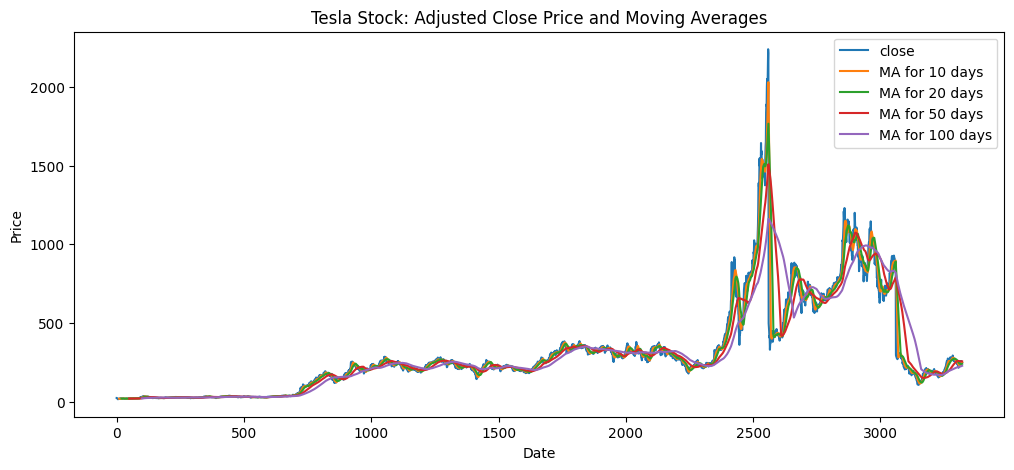

In [ ]:
# Calculate moving averages for different windows
df['MA for 10 days'] = df['close'].rolling(10).mean()
df['MA for 20 days'] = df['close'].rolling(20).mean()
df['MA for 50 days'] = df['close'].rolling(50).mean()
df['MA for 100 days'] = df['close'].rolling(100).mean()

# Truncate the data if needed
#The truncate() method in Python resizes the file to a specified size. If no size is given, it uses the current file position.
truncated_data = df.truncate()

# Plot the adjusted close price and moving averages
truncated_data[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots=False, figsize=(12, 5))

# Set the title and axis labels
plt.title('Tesla Stock: Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

In [ ]:
df.describe()
#df.shape

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d,Cumulative Return,Return,Year,Day,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days
count,3322.000000,3322.000000,3322.000000,3322.000000,3321.000000,3322.000000,3321.000000,3.303000e+03,3321.000000,3321.000000,3322.000000,3322.000000,3313.000000,3303.000000,3273.000000,3223.000000
mean,309.656139,316.512291,302.556364,309.716696,0.001695,66.452163,0.216628,9.623270e+07,12.967939,0.001695,2016.583685,2.025888,310.188169,310.734785,312.341799,315.148505
std,294.828884,302.956737,286.530087,295.027282,0.040092,99.129171,3.598838,6.460500e+07,12.349570,0.040092,3.829836,1.398560,291.484641,288.219468,280.654154,271.315836
min,16.140000,16.629900,14.979900,15.800100,-0.774862,1.053300,-21.060000,4.317139e+06,0.661372,-0.774862,2010.000000,0.000000,18.153000,19.278000,19.672008,20.987760
25%,142.419975,145.765050,139.197600,143.317575,-0.015607,9.980675,-1.560000,5.309270e+07,6.008815,-0.015607,2013.000000,1.000000,145.090440,146.329082,152.954600,158.967021
50%,234.415050,238.204950,229.548550,233.994900,0.001226,16.710350,0.120000,8.762201e+07,9.795349,0.001226,2017.000000,2.000000,234.419000,234.934500,232.523388,232.854498
75%,342.270000,347.755050,336.050025,342.389925,0.019393,55.646525,1.940000,1.290431e+08,14.337435,0.019393,2020.000000,3.000000,342.481980,339.854505,338.861820,338.629014
max,2295.120000,2318.490000,2186.520000,2238.750000,0.244027,409.970000,24.400000,3.886315e+08,93.711150,0.244027,2023.000000,4.000000,2029.593060,1765.733580,1508.610072,1160.820549


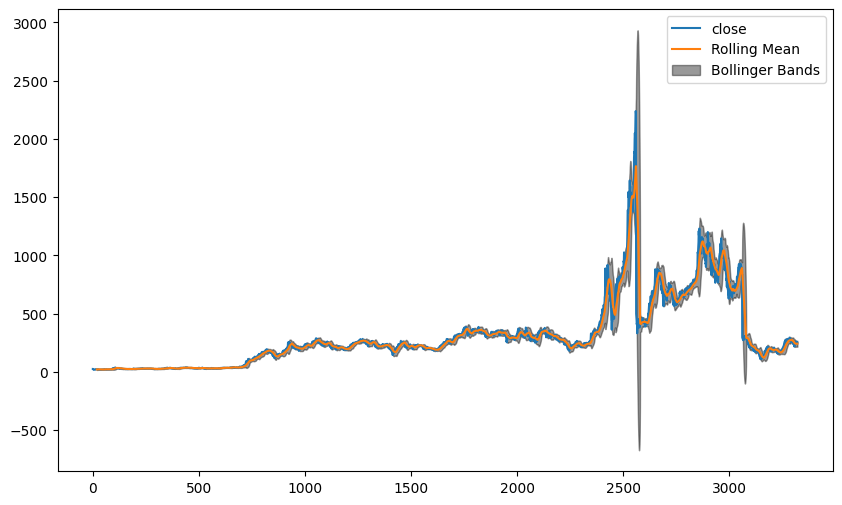

In [ ]:
#plotting bollinger band
rolling_mean = df['close'].rolling(window=20).mean()
rolling_std = df['close'].rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.index, df['close'], label='close')
ax.plot(rolling_mean.index, rolling_mean, label='Rolling Mean')
ax.fill_between(rolling_mean.index, upper_band, lower_band, alpha=0.4, color='black', label='Bollinger Bands')
ax.legend()
plt.show()

#  Tesla Stock movement in the year of 2023

<function matplotlib.pyplot.show(close=None, block=None)>

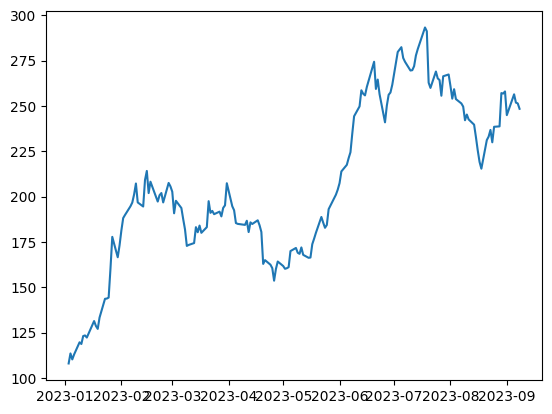

In [ ]:
a=df[df['date'] <= '2022-12-31'].index
b=df.drop(a)

plt.plot(b.date,b.close)
plt.show

# Profitable days vs Loss days

<function matplotlib.pyplot.show(close=None, block=None)>

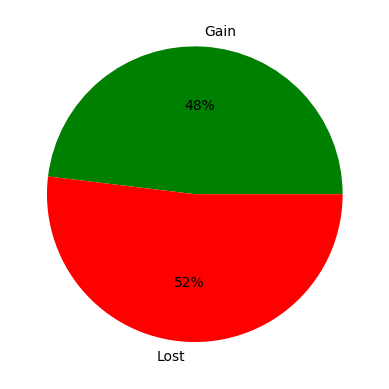

In [ ]:
gain=df[df['change_percent']<0]['date'].count()
lost=df[df['change_percent']>0]['date'].count()

labels=['Gain','Lost']
sizes=[gain,lost]
colors=['g','r']
plt.pie(sizes,labels=labels,autopct='%1.f%%',colors=colors)

plt.show

In [ ]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM


In [ ]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (2641, 20, 1)
y_train shape: (2641, 1, 1)


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
83/83 [==============================] - 2s 5ms/step - loss: 0.0043
Epoch 2/50
83/83 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 3/50
83/83 [==============================] - 0s 5ms/step - loss: 7.1900e-04
Epoch 4/50
83/83 [==============================] - 0s 5ms/step - loss: 7.0684e-04
Epoch 5/50
83/83 [==============================] - 0s 5ms/step - loss: 6.8721e-04
Epoch 6/50
83/83 [==============================] - 0s 5ms/step - loss: 6.1073e-04
Epoch 7/50
83/83 [==============================] - 0s 5ms/step - loss: 5.8791e-04
Epoch 8/50
83/83 [==============================] - 0s 5ms/step - loss: 5.6171e-04
Epoch 9/50
83/83 [==============================] - 0s 5ms/step - loss: 5.0913e-04
Epoch 10/50
83/83 [==============================] - 0s 6ms/step - loss: 4.7736e-04
Epoch 11/50
83/83 [==============================] - 0s 5ms/step - loss: 4.6450e-04
Epoch 12/50
83/83 [==============================] - 0s 6ms/step - loss: 4.2293e-04
Epoch 13/

In [ ]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 0.000272818113444373
Testing Loss: 0.0003814951633103192


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

21/21 [==============================] - 0s 2ms/step


In [ ]:
# Inverse transform the predictions to get actual stock prices
y_pred = scaler.inverse_transform(y_pred)
#y_test_actual = scaler.inverse_transform(y_test)
print(y_test.shape)
if y_test.shape[1] == 1:
    y_test = y_test.reshape((y_test.shape[0], 1))
y_test_actual = scaler.inverse_transform(y_test)

(661, 1, 1)


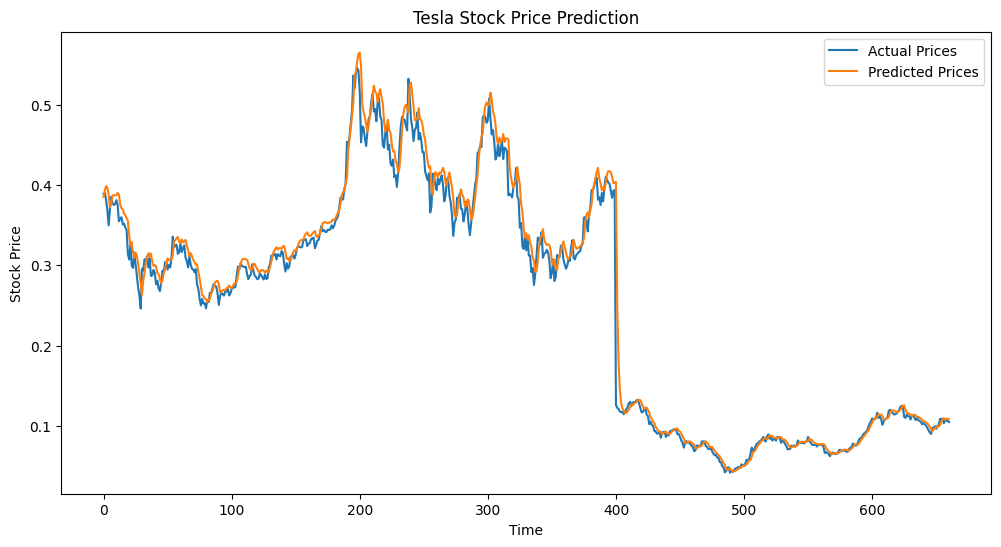

In [ ]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()